In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score





In [46]:
filePath = r"C:\Users\Dell\Downloads\realistic_ocean_climate_dataset.csv"
df = pd.read_csv(filePath)
print(df.head())

         Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
0  2015-01-01             Red Sea   20.0248    38.4931     29.47     8.107   
1  2015-01-07  Great Barrier Reef  -18.2988   147.7782     29.65     8.004   
2  2015-01-14       Caribbean Sea   14.9768   -75.0233     28.86     7.947   
3  2015-01-20  Great Barrier Reef  -18.3152   147.6486     28.97     7.995   
4  2015-01-27           Galápagos   -0.8805   -90.9769     28.60     7.977   

  Bleaching Severity  Species Observed  Marine Heatwave  
0                NaN               106            False  
1               High               116            False  
2               High                90            False  
3             Medium                94            False  
4                NaN               110            False  


In [50]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Then drop original date column
df = df.drop(columns=['Date'])


In [52]:
df.isnull().sum()

Location                0
Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
Year                    0
Month                   0
Day                     0
dtype: int64

In [54]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [56]:


df[df.duplicated()]


,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year,Month,Day


In [58]:
df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

In [60]:
df['Location'].unique()

array(['Red Sea', 'Great Barrier Reef', 'Caribbean Sea', 'Galápagos',
       'South China Sea', 'Maldives', 'Hawaiian Islands'], dtype=object)

In [72]:
#df = pd.get_dummies(df,columns=['Location'])
print(df.columns)

Index(['Location', 'Latitude', 'Longitude', 'SST (°C)', 'pH Level',
       'Bleaching Severity', 'Species Observed', 'Marine Heatwave', 'Year',
       'Month', 'Day'],
      dtype='object')


In [74]:
#select Feature And Target 

#Target Variable 
y = df['Marine Heatwave']

#Feature Matrix [Drop Targeted Column]

X = df.drop(columns = ['Marine Heatwave'])



In [76]:
#split the data 

X_train ,X_test , y_train,y_test = train_test_split(
    X,y,test_size = 0.2,random_state = 42
)

In [82]:
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['Location', 'Bleaching Severity'], dtype='object')


In [88]:
# One-hot encode the 'Location' column
df = pd.get_dummies(df, columns=['Location'], drop_first=True)


In [90]:
# Convert 'Bleaching Severity' to numeric (if it's categorical)
df['Bleaching Severity'] = df['Bleaching Severity'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [92]:
print(df.head())


   Latitude  Longitude  SST (°C)  pH Level  Bleaching Severity  \
0   20.0248    38.4931     29.47     8.107                 NaN   
1  -18.2988   147.7782     29.65     8.004                 2.0   
2   14.9768   -75.0233     28.86     7.947                 2.0   
3  -18.3152   147.6486     28.97     7.995                 1.0   
4   -0.8805   -90.9769     28.60     7.977                 NaN   

   Species Observed  Marine Heatwave  Year  Month  Day  Location_Galápagos  \
0               106                0  2015      1    1               False   
1               116                0  2015      1    7               False   
2                90                0  2015      1   14               False   
3                94                0  2015      1   20               False   
4               110                0  2015      1   27                True   

   Location_Great Barrier Reef  Location_Hawaiian Islands  Location_Maldives  \
0                        False                      Fa

In [98]:

print(X.dtypes)


Location               object
Latitude              float64
Longitude             float64
SST (°C)              float64
pH Level              float64
Bleaching Severity     object
Species Observed        int64
Year                    int32
Month                   int32
Day                     int32
dtype: object


In [100]:

X = pd.get_dummies(X, columns=['Location'], drop_first=True)


In [102]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


X['Bleaching Severity'] = le.fit_transform(X['Bleaching Severity'])


In [104]:

print(X.dtypes)


Latitude                       float64
Longitude                      float64
SST (°C)                       float64
pH Level                       float64
Bleaching Severity               int32
Species Observed                 int64
Year                             int32
Month                            int32
Day                              int32
Location_Galápagos                bool
Location_Great Barrier Reef       bool
Location_Hawaiian Islands         bool
Location_Maldives                 bool
Location_Red Sea                  bool
Location_South China Sea          bool
dtype: object


In [106]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 10) (100, 10) (400,) (100,)


In [110]:

print(X.dtypes)


Latitude                       float64
Longitude                      float64
SST (°C)                       float64
pH Level                       float64
Bleaching Severity               int32
Species Observed                 int64
Year                             int32
Month                            int32
Day                              int32
Location_Galápagos                bool
Location_Great Barrier Reef       bool
Location_Hawaiian Islands         bool
Location_Maldives                 bool
Location_Red Sea                  bool
Location_South China Sea          bool
dtype: object


In [112]:



y = df['Marine Heatwave']  # Target column
X = df.drop(columns=['Marine Heatwave'])  # Features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
[[81  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        19

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



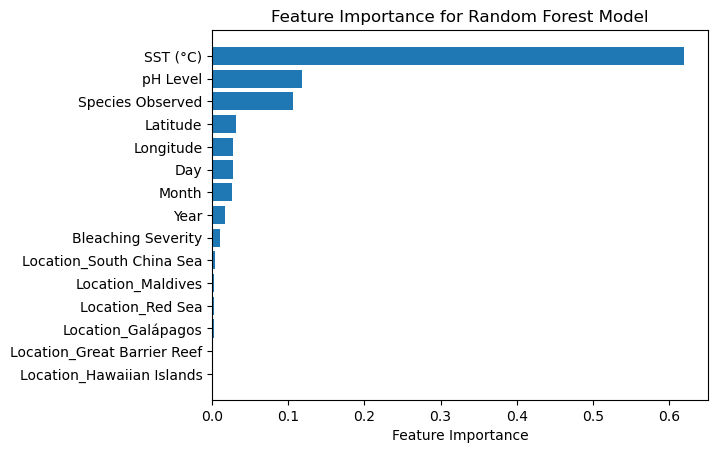

In [114]:

feature_importances = model.feature_importances_


sorted_idx = feature_importances.argsort()


import matplotlib.pyplot as plt

plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest Model")
plt.show()


In [116]:
df.to_csv('heatwave_dataset.csv',index=False)